# forecast (시계열 분석)

#### 1. 배경 및 설치

- fbprophet
    - https://facebook.github.io/prophet/
- install
    - 윈도우 유저는 Visual C++ Build Tool을 먼저 설치해주세요
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader 
    - conda install -c conda-forge fbprophet
    - pip install fbprophet(mac)

In [3]:
from pandas_datareader import data
from prophet import Prophet

#### 함수 def 기초

In [10]:
# 이름 test_def와 인자 a,b

def test_def(a,b) :
    return a+b

In [8]:
c = test_def(3,5)
c

8

In [9]:
5+c

13

In [19]:
a = 1

# def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은것이 아니다.
# 전역변수를 쓰고싶다면 global

def edit_a(a) :
    return a

In [20]:
print(edit_a(5))

5


In [21]:
a

1

#### $$는 수학기호처럼 만들어줌
$$ y = asin $$

#### \pi는 파이 기호를 만들어줌

$$ y = asin(2\pi ft + t_0)+b)

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [29]:
def plotSineWave(amp, freq, endTime, sampleTime, startTime, bias) :
    # shift+tab으로 볼수있음
    """
    plot sin wave
    y = a sin (2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin( 2 * np.pi * freq * time + startTime ) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

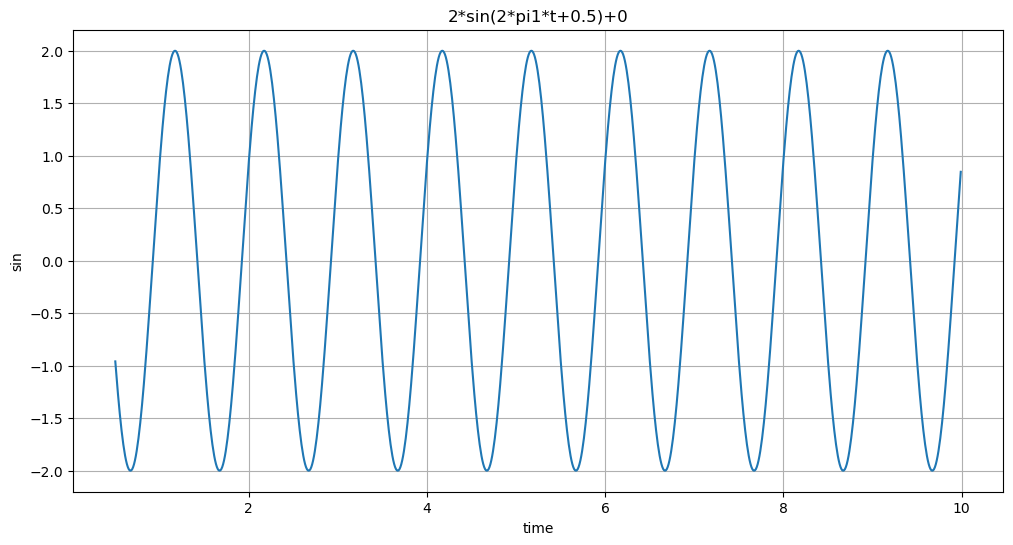

In [30]:
plotSineWave(2,1,10,0.01,0.5,0)

In [36]:
def plotSinWave2(**kwargs) : # **뒤에 아무거나 적어도됨
    """
    plot sin wave
    y = a sin (2 pi f t + t_0) + b
    """

    amp = kwargs.get("amp",2)
    freq = kwargs.get("freq",1)
    endTime = kwargs.get("endTime",10)
    sampleTime = kwargs.get("sampleTime",0.01)
    startTime = kwargs.get("startTime",0.5)
    bias = kwargs.get("bias",0)


    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin( 2 * np.pi * freq * time + startTime ) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

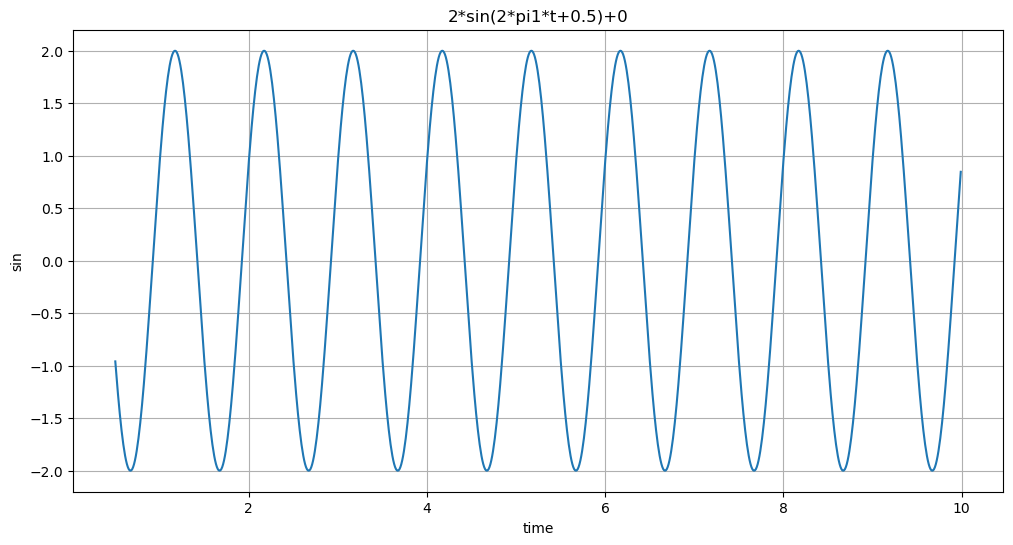

In [37]:
plotSinWave2()

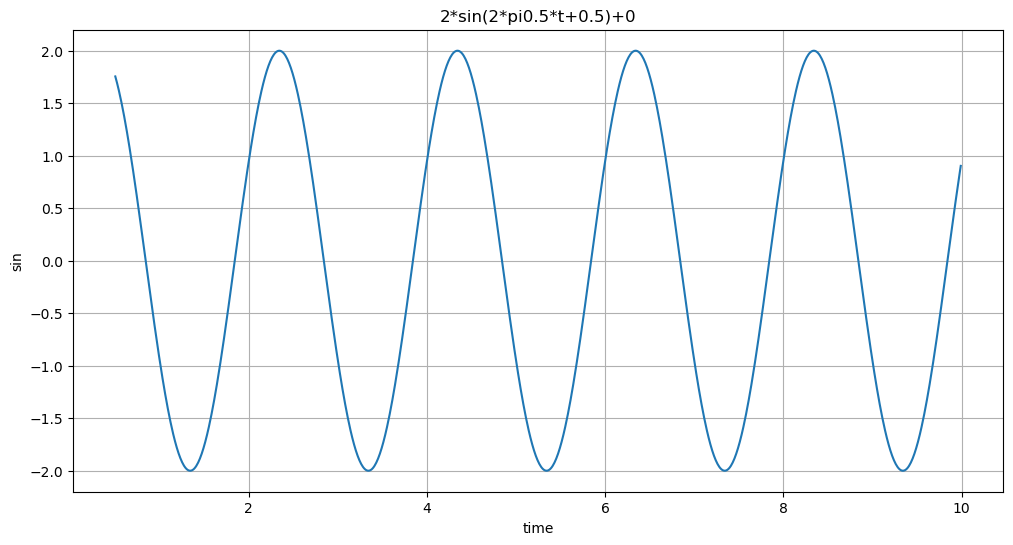

In [38]:
plotSinWave2(amp = 2, freq = 0.5, endTime = 10)

#### 내가만든 함수 import
- drawWindWave.py

In [44]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave2(**kwargs) : # **뒤에 아무거나 적어도됨
    """
    plot sin wave
    y = a sin (2 pi f t + t_0) + b
    """

    amp = kwargs.get("amp",2)
    freq = kwargs.get("freq",1)
    endTime = kwargs.get("endTime",10)
    sampleTime = kwargs.get("sampleTime",0.01)
    startTime = kwargs.get("startTime",0.5)
    bias = kwargs.get("bias",0)


    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin( 2 * np.pi * freq * time + startTime ) + bias

    plt.figure(figsize=(12,6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

if __name__ == "__main__" :
    print("hello python")
    plotSinWave2(amp=1, endTime=2)

Overwriting ./drawSinWave.py


In [45]:
import drawSinWave as ds

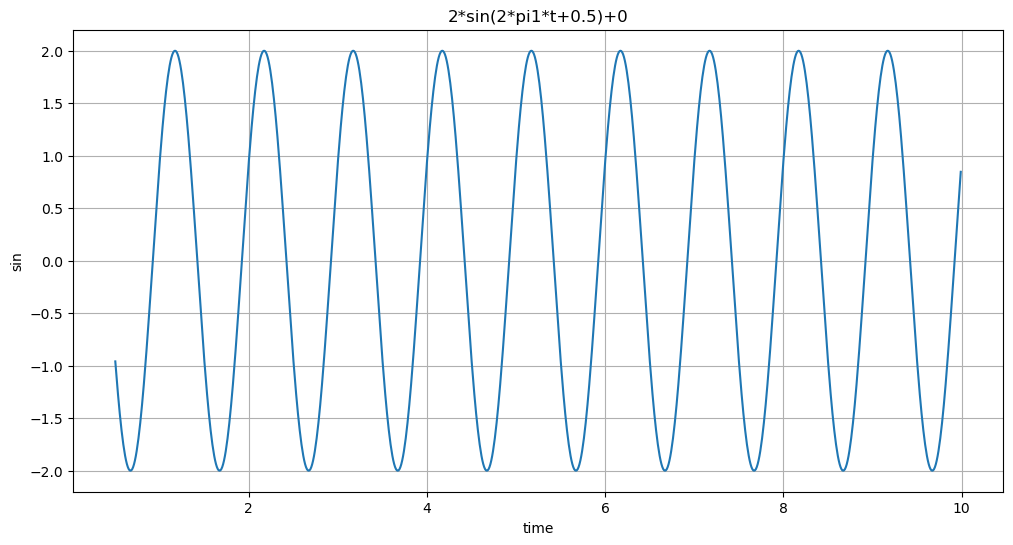

In [50]:
ds.plotSinWave2()

##### 그래프 한글설정

In [84]:
%%writefile ./module/set_matplotlib_hangul.py

from matplotlib import font_manager as fm
from matplotlib import pyplot as plt

#한글폰트 깨짐 해결
get_ipython().run_line_magic("matplotlib", "inline")
plt.rc('font', family = "Malgun Gothic")

#마이너스부호 깨짐 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False


Writing ./module/set_matplotlib_hangul.py


In [85]:
import module.set_matplotlib_hangul

----

In [5]:
## 2. 기초

import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
%matplotlib inline

##### 1

In [6]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2022-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y" :result})

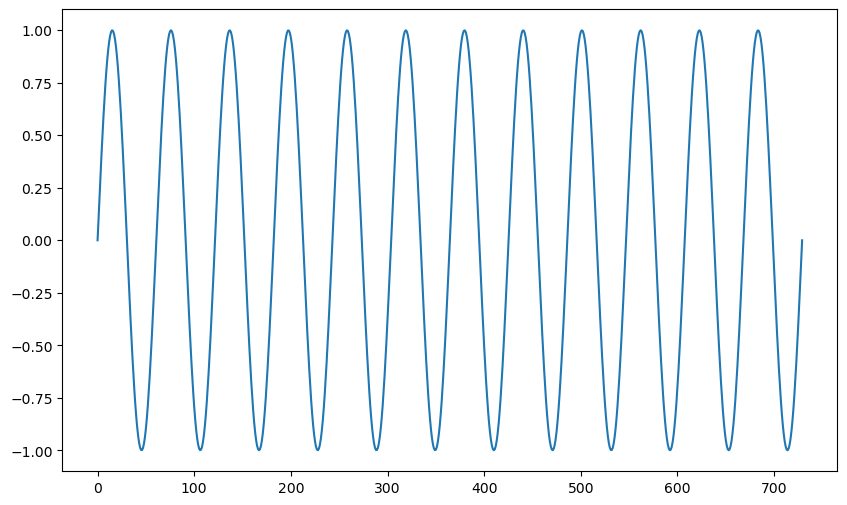

In [8]:
df["y"].plot(figsize=(10,6));

In [9]:
from prophet import Prophet

m=Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df);

18:37:25 - cmdstanpy - INFO - Chain [1] start processing
18:37:25 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

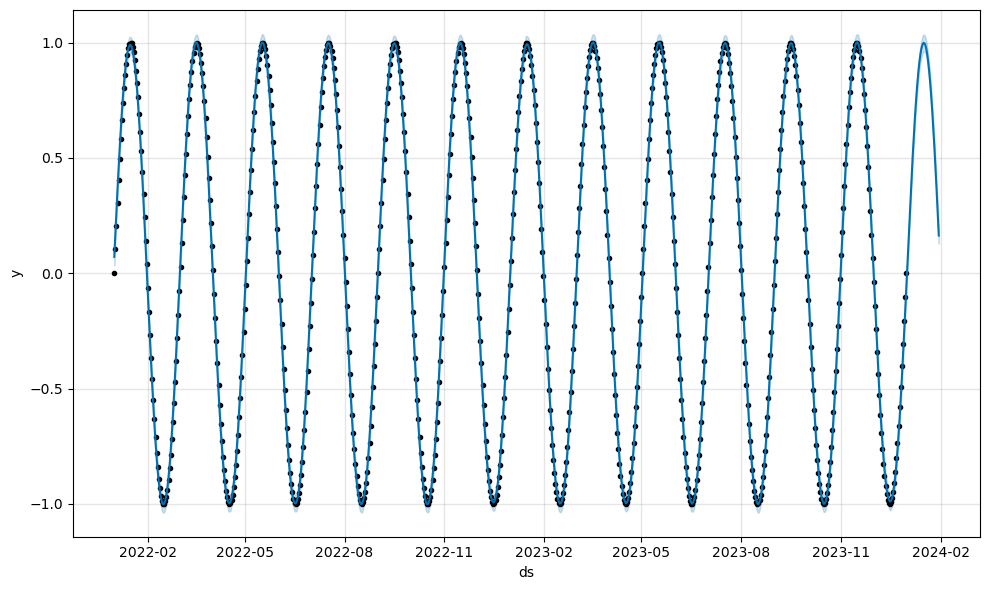

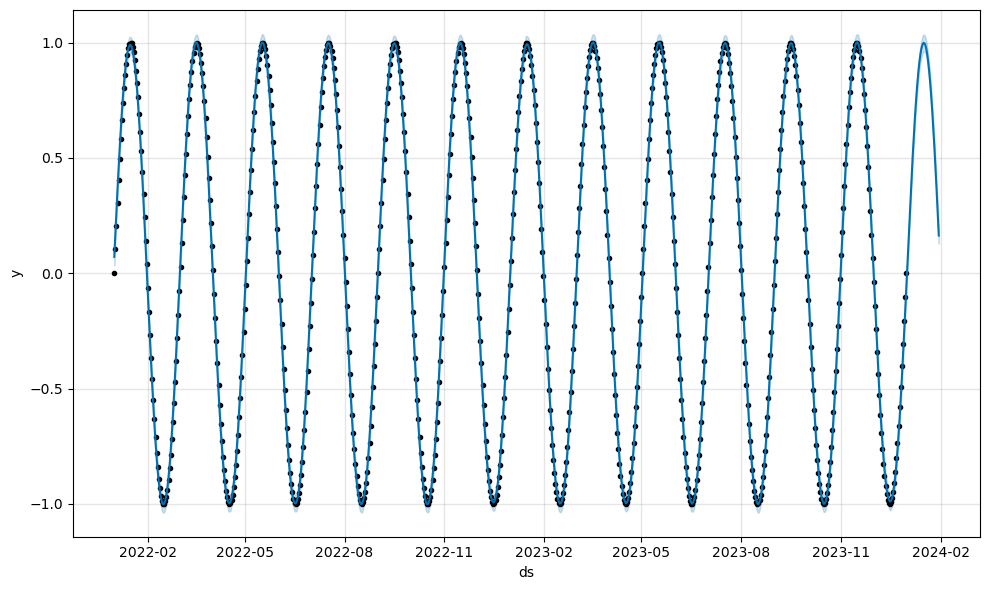

In [11]:
m.plot(forecast)

##### 2

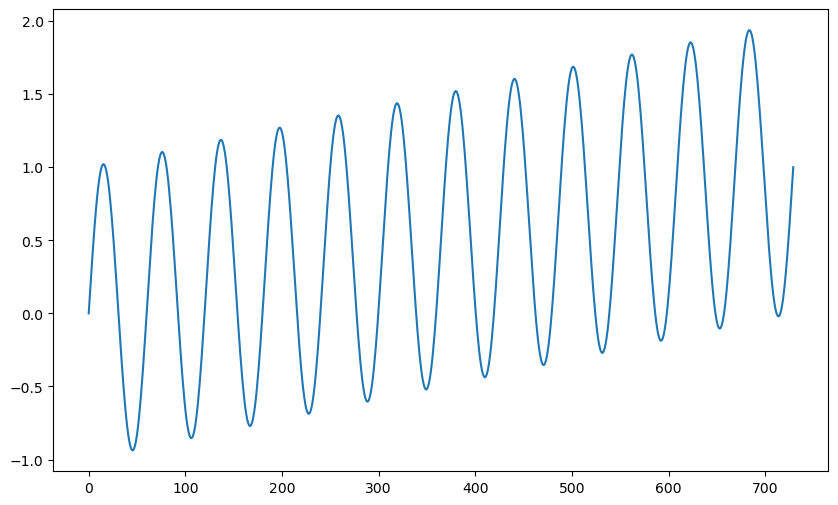

In [14]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time
ds = pd.date_range("2022-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y" :result})

df["y"].plot(figsize=(10,6));

18:41:10 - cmdstanpy - INFO - Chain [1] start processing
18:41:10 - cmdstanpy - INFO - Chain [1] done processing


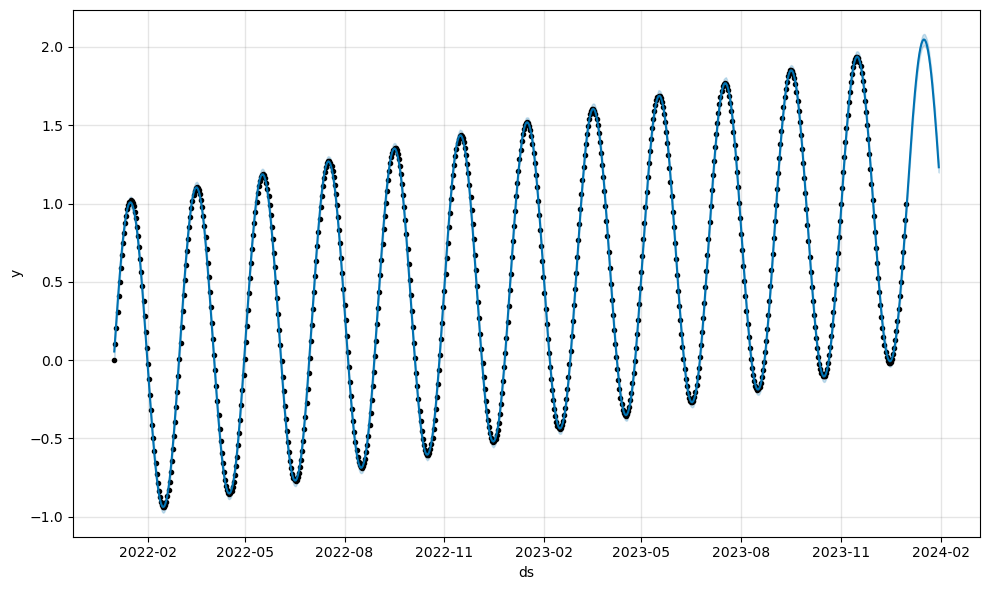

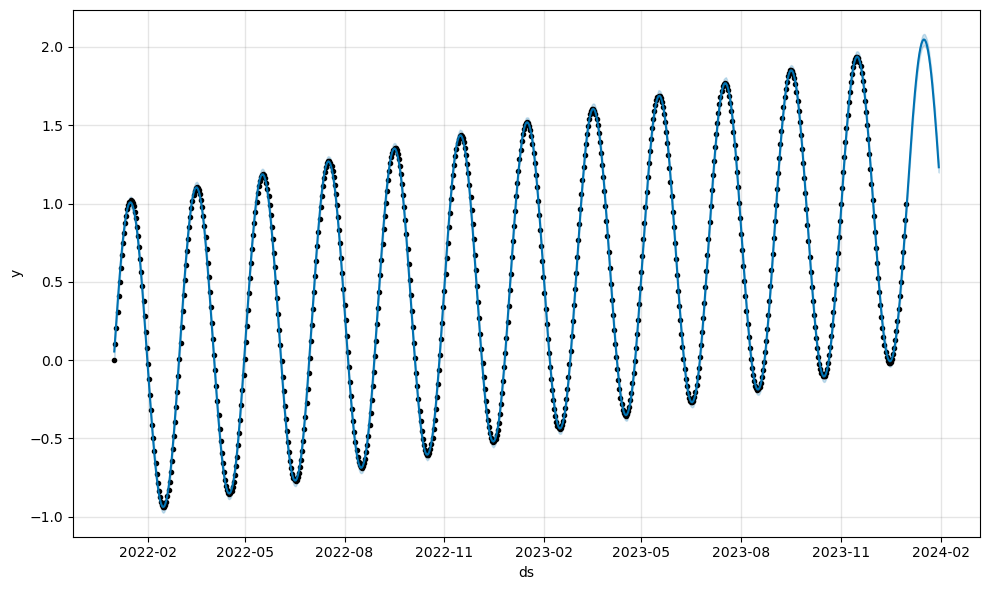

In [16]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

##### 3

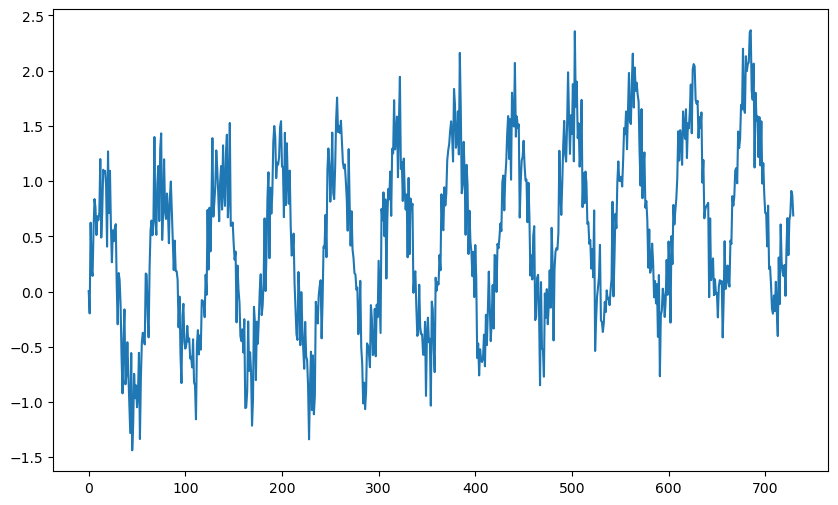

In [18]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4
ds = pd.date_range("2022-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds":ds, "y" :result})

df["y"].plot(figsize=(10,6));

18:42:21 - cmdstanpy - INFO - Chain [1] start processing
18:42:21 - cmdstanpy - INFO - Chain [1] done processing


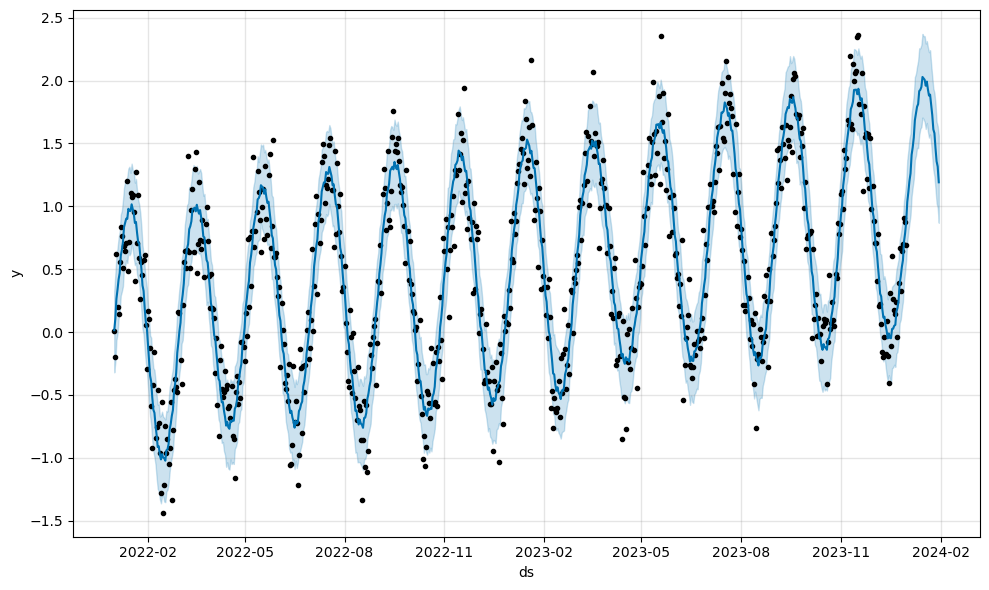

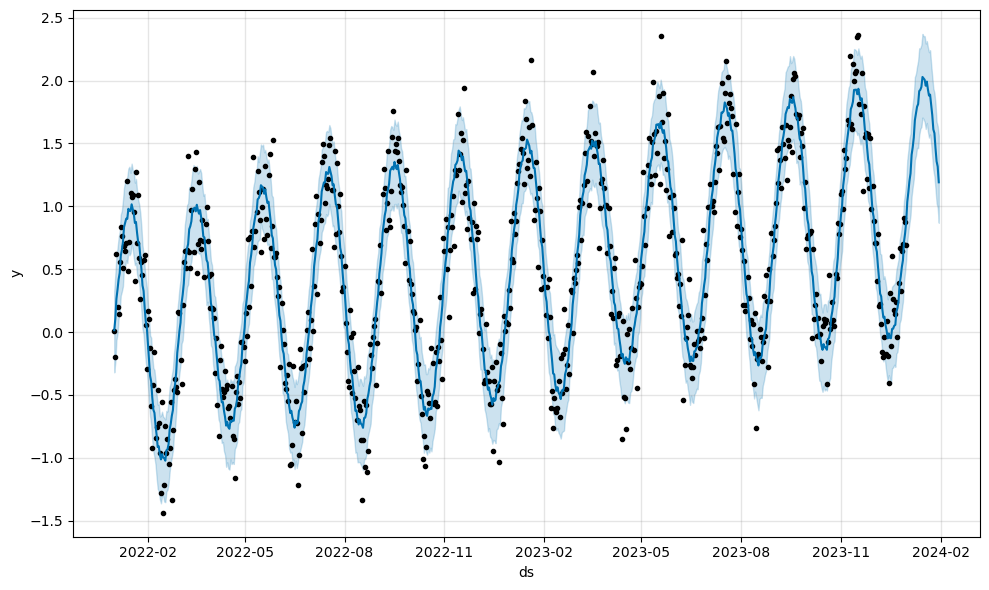

In [19]:
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

--------------

In [20]:
from module import set_matplotlib_hangul

In [21]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

%matplotlib inline

In [29]:

pinkwink_web = pd.read_csv(
    "C:/Users/solbi/OneDrive/Documents/ds_study/data/05_PinkWink_Web_Traffic.csv",
    encoding="utf-8",
    thousands=",",
    names=["date","hit"],
    index_col=0
    )

pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 27.,1436.0
17. 6. 28.,1387.0
17. 6. 29.,1328.0


In [30]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366 entries, 16. 7. 1. to nan
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


In [32]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


In [33]:
pinkwink_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 16. 7. 1. to 17. 6. 30.
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hit     365 non-null    float64
dtypes: float64(1)
memory usage: 5.7+ KB


<Axes: xlabel='date'>

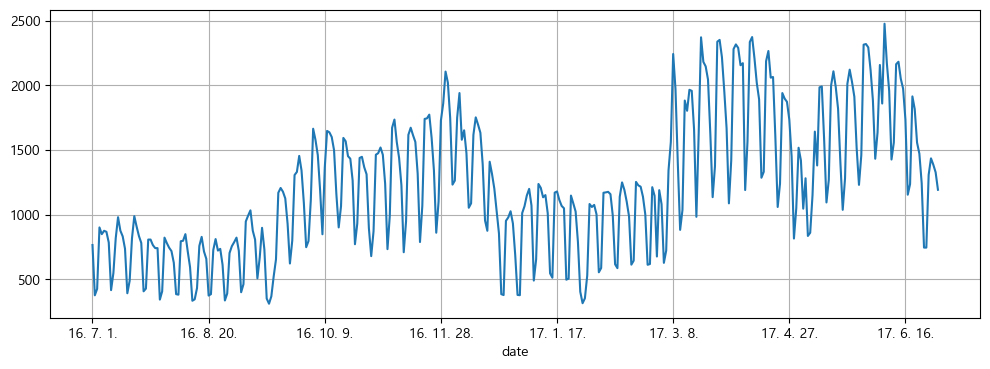

In [34]:
# 전체 데이터 그려보기

pinkwink_web["hit"].plot(figsize=(12,4),grid=True)

In [35]:
# trend분석을 시각화 하기 위한 x축 값 만들기

time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0,time[-1],1000)

In [39]:
# 에러 계산할 함수

def error(f,x,y) :
    return np.sqrt(np.mean(f(x)-y)**2)

In [40]:
f1p = np.polyfit(time, traffic,1)
f1 = np.poly1d(f1p)

f2p = np.polyfit(time, traffic,2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic,3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic,15)
f15 = np.poly1d(f15p)

In [44]:
print(error(f1,time,traffic))
print(error(f2,time,traffic))
print(error(f3,time,traffic))
print(error(f15,time,traffic))

2.940284241348097e-13
4.435344025084417e-13
3.4884728287180807e-13
7.120120381555291e-07


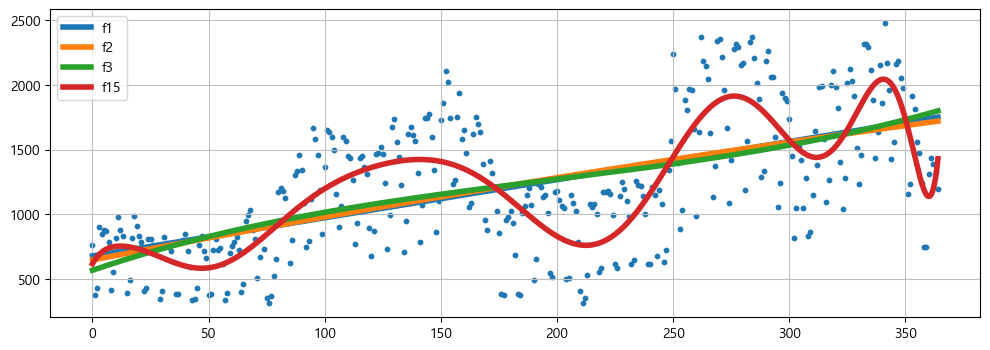

In [53]:
plt.figure(figsize=(12,4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw = 4, label = "f1")
plt.plot(fx, f2(fx), lw = 4, label = "f2")
plt.plot(fx, f3(fx), lw = 4, label = "f3")
plt.plot(fx, f15(fx), lw = 4, label = "f15")

plt.grid(True, linestyle = "-", color = "0.75")
plt.legend(loc=2)
plt.show()

In [58]:
df = pd.DataFrame({"ds":pinkwink_web.index, "y" : pinkwink_web["hit"]})
df.reset_index(inplace=True)
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
del df["date"]
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [59]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

19:38:44 - cmdstanpy - INFO - Chain [1] start processing
19:38:44 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
# 60일에 해당하는 데이터예측

future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [62]:
# 예측결과는 상한/하한의 범위를 포함해서 얻어진다.

forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,921.853195,701.892088,1115.890922
421,2017-08-26,506.954908,280.493018,718.629633
422,2017-08-27,639.454293,441.604422,851.085532
423,2017-08-28,1191.944049,977.852780,1397.862613
424,2017-08-29,1227.806799,1022.545302,1439.124318


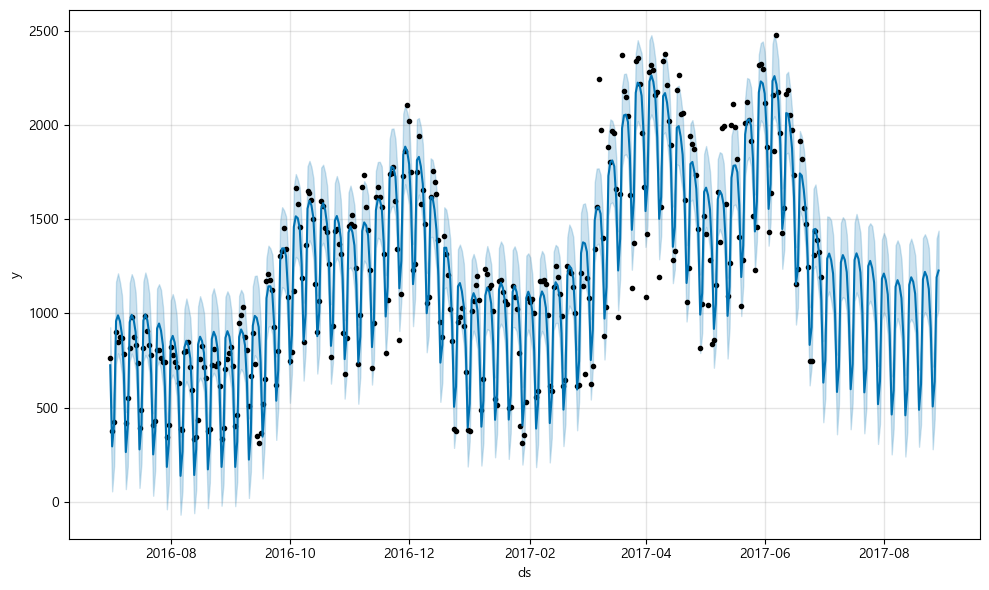

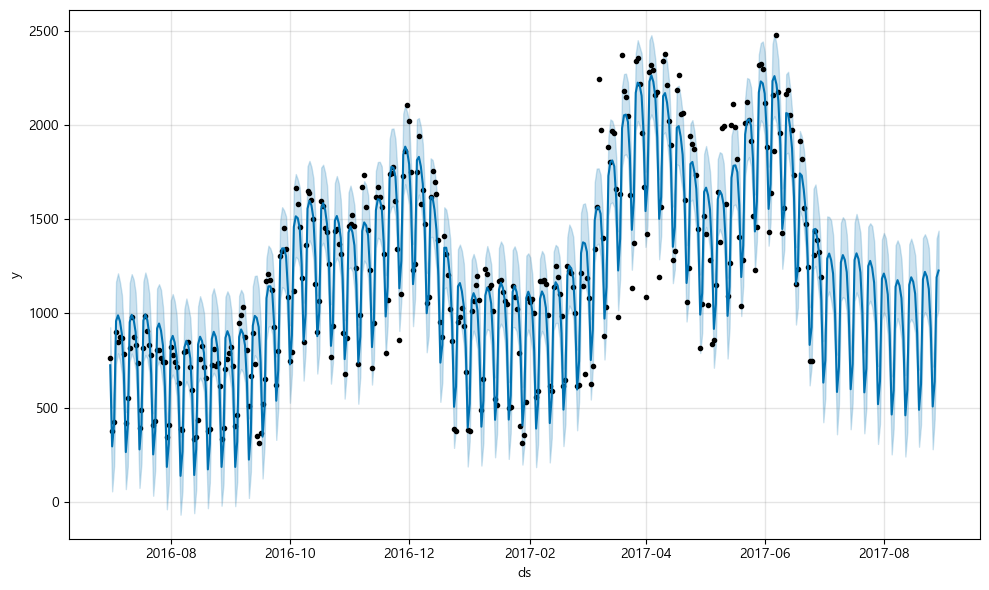

In [63]:
m.plot(forecast)

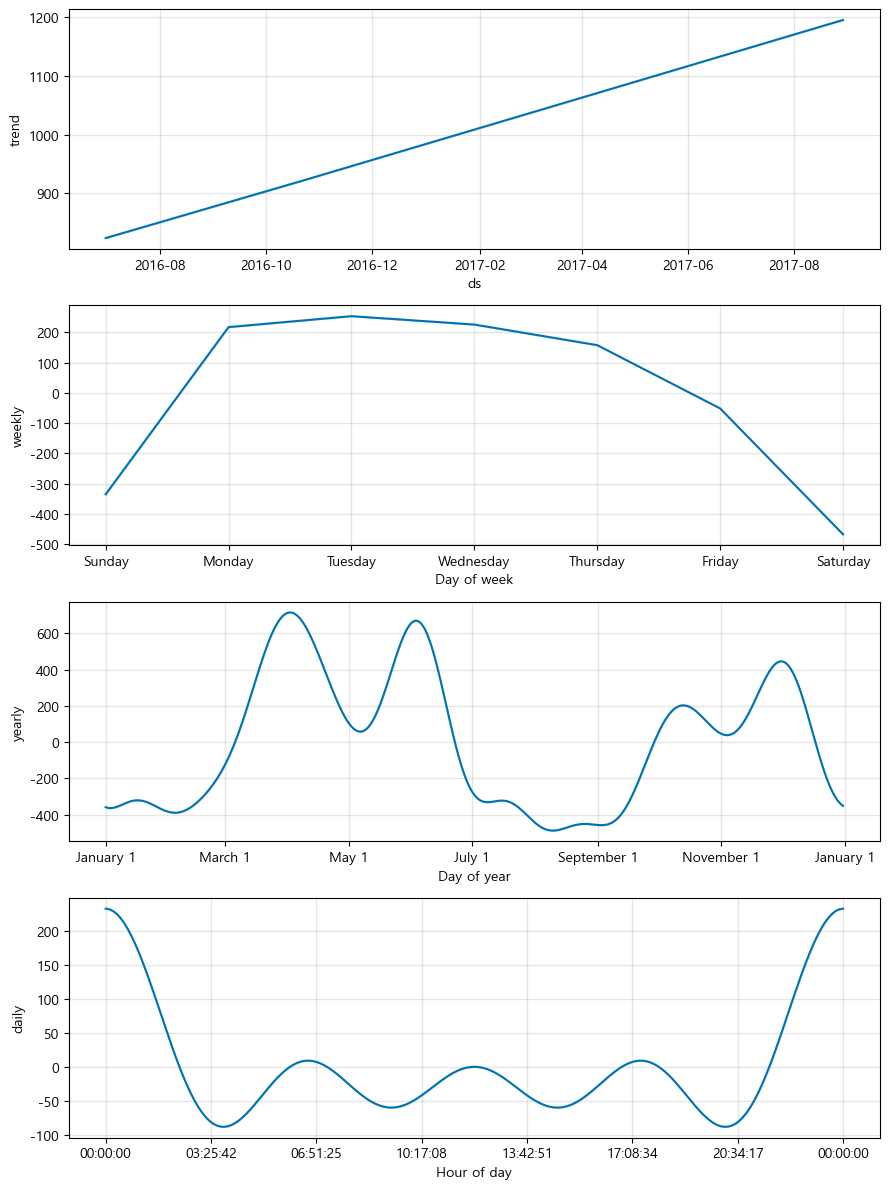

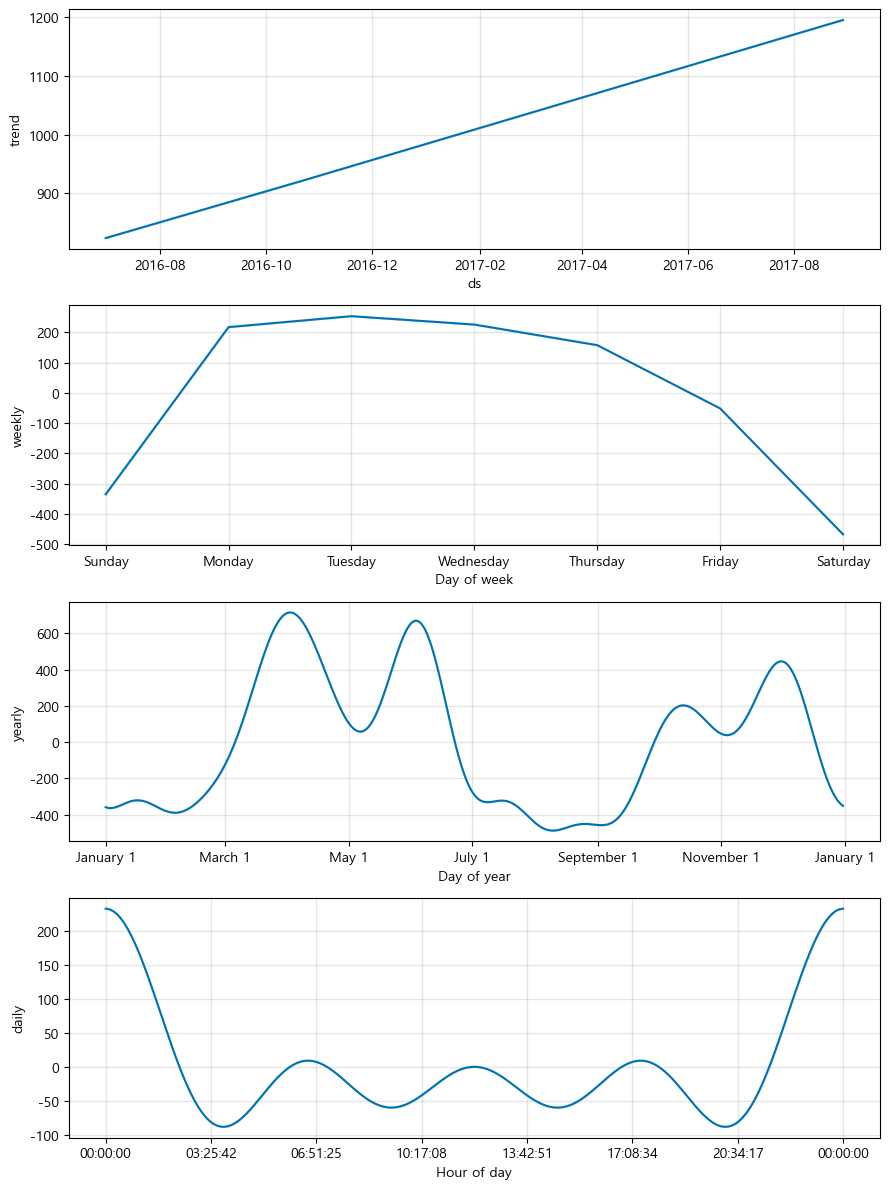

In [64]:
m.plot_components(forecast)